In [91]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [92]:
from pandas import *

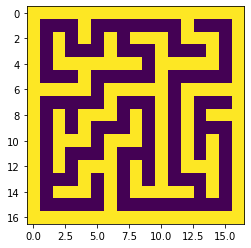

In [257]:
def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=numpy.array(make_maze(8,8))
imshow(maze)

#maze[]

In [111]:
print(maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1]
 [1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1]
 [1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1]
 [1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1]
 [1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1]
 [1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1]
 [1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


160


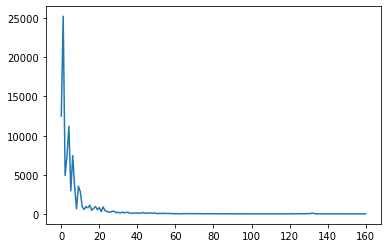

In [261]:
# Skapa en 2-dimensionell array som är 17*17 stor och innehåller fyra värden 0.25 0.25 0.25 och 0.25 som
# används som odds att gå i en viss riktning
policy=numpy.ones((17,17,4))/4.0

# Anger hur stor skillnad oddsen som ska ske när den lär sig
learningRate=0.1

# Variabel för att spara det försök som gick i mål på färst steg
fastestRun=1000000


# Variabel för att spara hur många steg det tog att nå målet på varje försök
L=[]

for runs in range(1000):
    # En array med samma storlek som labyrinten för att spara om en ruta är besökt eller inte
    visited=numpy.zeros((17,17))

    # Start
    x=1
    # Mål
    y=1

    # Arrayer
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]

    #arrayer för att spara positioner som den har varit på
    trackX=[x]
    trackY=[y]
    
    #arrayer för vart man inte kan gå 
    wallTrackX=[]
    wallTrackY=[]

    #arrayer för att spara actions och errors
    actions=[]
    walls=[]
    
    #två dimensionell array för att säga att startpositionen är visited
    visited[x][y]=1
    
    #while loop som säger att den ska köras till x och y positionen är 15
    while not (x==15 and y==15):
        #random choice i vilket den ska gå
        direction=numpy.random.choice([0,1,2,3], p=policy[x][y])
        tx=x+xm[direction]
        ty=y+ym[direction]
        #Kollar att det är ett godkänt action, dvs det är ingen vägg
        if maze[tx][ty]==0:
            x=tx
            y=ty
            visited[x][y]+=1
            trackX.append(x)
            trackY.append(y)
            actions.append(direction)    
        else:
            #är det en vägg lägger vi in den i error för att den inte ska försöka senare
            wallTrackX.append(tx)
            wallTrackY.append(ty)
            walls.append(direction)
  
    
    #om vi har besökt en ruta mer än en gång sätter vi optimal path till False. Den kan alltså bättre
    bestSolution = True
    for i in range(len(visited)):
        for j in range(len(visited[i])):
            if visited[i][j] > 1:
                bestSolution = False
                break
            
    # om den är den går till mål på färre steg än den snabbaste ökar vi learningrate för denna lösning
    if len(actions) <= fastestRun * 1.75:
        if len(actions) < fastestRun:
            fastestRun = len(actions)
        for i in range(len(actions)):
            policy[trackX[i]][trackY[i]][actions[i]]+=learningRate
    #om den har försökt gå in i väggar minskar vi sänker vi learningraten till 0 för de movsen
        for i in range(len(walls)):
                policy[wallTrackX[i]][wallTrackY[i]][walls[i]] = 0    
            

        for i in range(17):
            for j in range(17):
                policy[i][j]/=policy[i][j].sum()

    L.append(len(actions))
    
   
    #om vi har hittat den bästa vägen, dvs vi besöker enbart rutan en gång sätter vi bestSolution till
    # True, gör laddtiden bättre. 
    if bestSolution:
        print(runs)
        break
        


plot(L)

64
[9.99999191e-01 8.09309648e-07 8.20563990e-12 8.20563990e-12]


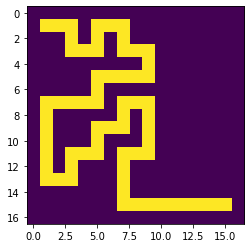

In [262]:
imshow(visited)
print(len(actions))
print(policy[1][1])

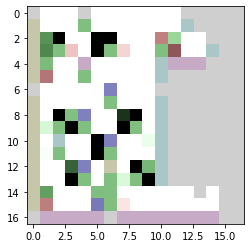

In [263]:
imshow(policy)